# 3.4 サーポートベクトルマシンによる最大マージン分類
- パーセプトロンの拡張とみなすことができる
- SVMでの最適化の目的は、マージンを最大化にすること
- マージンは、超平面（決定境界）と、この超平面に最も近いトレーニングサンプルとの間の距離として定義される
- 超平面に最も近いトレーニングサンプルはサポートベクトルと呼ばれる。

# 3.4.1 最大マージンを直感的に理解する
- 決定境界のマージンを大きくする理論的根拠は、汎化誤差が小さくなる傾向にあること
- マージンの小さいモデルは過学習に陥りがちである。
- 以下直感的理解のために、正と負の超平面を詳しくみる
$$w_{0}+\vec{w}^{T}\vec{x}_{pos} = 1$$
$$w_{0}+\vec{w}^{T}\vec{x}_{neg} = -1$$
$$⇒\vec{w}^{T}(\vec{x}_{pos} - \vec{x}_{neg})=2$$
- ここでベクトルの長さを定義する。

$$\| \vec{w} \| = \sqrt{\sum^{m}_{j=1} w^{2}_{j}}$$

$$\frac{\vec{w}^{T}(\vec{x}_{pos} - \vec{x}_{neg})}{\| \vec{w} \|} = \frac{2}{\| \vec{w} \|}$$
- 上式の左辺は正の超平面と負の超平面の距離であると解釈できて、最大化したいマージンである。
- サンプルが正しく分類されているという制約のもとでSVMの目的関数を最大化する問題は$\frac{2}{\| \vec{w} \|}$の最大化に帰着される
- 実際には$\frac{1}{2} \| \vec{w} \|^{2}$を最小化する

$$y^{i}(w_{0} + \vec{w}^{T}\vec{x}^{i}) \geq 1 \ \forall i$$
- 負のサンプルはすべての負の超平面の側にあり、正のサンプルはすべて正の超平面の後ろに収まることを示している。
- 線形分離可能であることという、制約条件か？？？とう言うか、この枠組みでSVMが正常に作動するための前提条件？？？

# 3.4.2 スラック変数を使った非線形分離可能なケースへの対処
- スラック変数$\xi$が導入されたのは、非線形分離可能なデータのために線形制約を緩和する必要があったからである。
- スラック変数の導入により、適切なコストペナルティを科した上で、誤分類が存在する状態のまま最適化問題を収束させる事が可能になった。
- 要するに線形制約を緩和するために$\xi$を導入するということ
$$\vec{w}^{T} \vec{x}^{(i)} \geq 1-\xi^{i} \  (y^{(i)}=1)$$
$$\vec{w}^{T} \vec{x}^{(i)} \leq -1+\xi^{i} \  (y^{(i)}=-1)$$

- 誤分類が起きた時は、$\xi>1$。$\sum_{i}\xi^{(i)}$が整数K以下であれば、誤分類したサンプルもK個以下であることを意味する。
- 最小化すべき新しい対象は以下
- 変数Cで誤分類のペナルティを制御する。Cが大きいとバリアンスが大きく、Cが小さいとバリアンスは小さい
- 【復習】バリアンスが大きいとは、学習データのとり方によって、出来上がったモデルの予測値がばらつくことを意味する。
$$\frac{1}{2}\| \vec{w} \|^{2} + C　\Biggl( \sum_{i}\xi^{(i)} \Biggr)$$

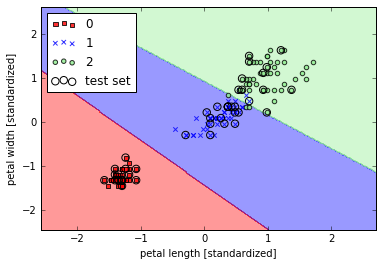

In [5]:
#トレーニングデータとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std,X_test_std))
#トレーニングデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train,y_test))

# SVMのモデルでトレーニングして、Irisのデータセットの品種を分類する。
from sklearn.svm import SVC
# 線形SVMのインスタスを作成
svm = SVC(kernel='linear',C=1.0,random_state=0)
#線形SVMのモデルにトレーニングデータを適合させる
svm.fit(X_train_std,y_train)

plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# 3.5 カーネルSVMを使った非線形問題の球解
- SVMの人気が高い理由は、非線形分類の問題を解くために「カーネル化」するのが容易であるため
- まずは非線形問題としてどのような例があるのかを確認する
- XORゲート形式の単純なデータ・セットを作成する。100個のサンプルクラスラベルに1、その他の100個に-1を割り当てる。
- XORゲートは、排他的論理和を求める電気回路であり、入力の２つの信号のどちらか一方が１となる時だけ1を出力する。

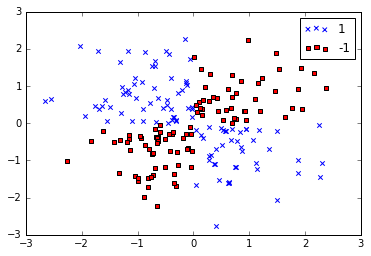

In [6]:
#乱数種を指定
np.random.seed(0)
#標準正規分布に従う乱数で200行2列の行列を作成
X_xor = np.random.randn(200,2)
#2つの因数に対して排他的論理和を実行
y_xor = np.logical_xor(X_xor[:,0] > 0,X_xor[:,1] > 0)
#排他的論理和の値が真の場合は1、偽の場合は-1
y_xor = np.where(y_xor,1,-1)
#ラベル1を青のxでプロット
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='b',marker='x',label='1')
#ラベル2を赤の四角でプロット
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c='r',marker='s',label='-1')

plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.show()

- 線形ロジスティック回帰、線形SVMを用いた場合、線形超平面の決定境界に基づいて陽性、陰性クラスを分割することになるが、この例ではうまく行かない
- 線形分離できないデータを処理するカーネル手法の基本的な発想は、射影関数$\phi(\cdot)$を使って、それらの組み合わせを高次元空間へ射影し、線形分離できるようにすることである。
- 二次元のデータ・セットを三次元の特徴空間に変換する

# 3.5.1 カーネルトリックを使って分離超平面を高次元空間で特定する
- 新しい特徴量を生成する計算コストは高い。そこでものをいうのがカーネルトリック方である。
- SVMをトレーニングする際の二次計画法を求める際に、ベクトルのドット積$\vec{x}^{(i)T}\vec{x}^{(j)}$を$\phi(\vec{x}^{(i)})^{T}\phi(\vec{x}^{(j)})$に置き換えればいいだけ
- ドット積を2点間で陽に計算するとコストがかかるため、カーネル関数を定義する。
$$k(\vec{x}^{(i)},\vec{x}^{(j)}) = \phi(\vec{x}^{(i)})^{T}\phi(\vec{x}^{(j)})$$
- 最も広く使用されているカーネルの1つは、動径基底関数カーネルである。RBFカーネルや、ガウスカーネルとも呼ばれる。
$$k(\vec{x}^{(i)},\vec{x}^{(j)}) = exp(-\frac{\| \vec{x}^{(i)} - \vec{x}^{(j)} \|^{2}}{2\sigma^{2}})$$
- 大まかに、カーネルという用語は２つのサンプル間の類似性を表す関数であると解釈できる。

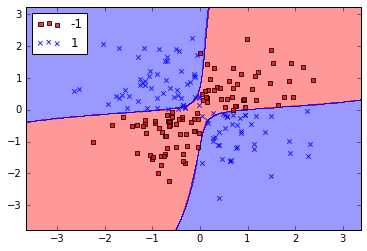

In [7]:
#RBFカーネルによるSVMのインスタンス作成
#パラメータgammaはカーネル関数のカットオフパラメータ
#値が小さいと、サンプルの影響が大きく、到達範囲が広くなり、決定境界がよりなめらかになる
svm = SVC(kernel='rbf',random_state=0,gamma=0.10,C=10.)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc='upper left')
plt.show()

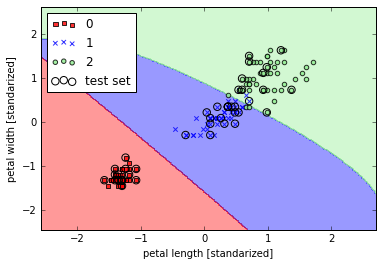

In [8]:
#RVFカーネルSVMをIrisデータ・セットに適用してみる
#RVFカーネルによるSVMのインスタンスを生成（2つのパラメータを変更）
svm = SVC(kernel='rbf',random_state=0,gamma=0.2,C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standarized]')
plt.ylabel('petal width [standarized]')
plt.legend(loc='upper left')
plt.show()

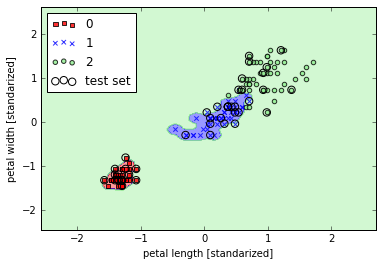

In [9]:
#gammaの値が大きい場合
svm = SVC(kernel='rbf',random_state=0,gamma=100,C=1.0)
svm.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standarized]')
plt.ylabel('petal width [standarized]')
plt.legend(loc='upper left')
plt.show()

- このモデルはトレーニングデータ・セットを非常にうまく適合するが、そのような分類器では、未知のデータで高い汎化誤差が生じることが考えられる。
- 過学習を抑制するためにもγの最適化が重要な役割を示している。

In [1]:
from sklearn import datasets
import numpy as np
#Irisデータをロード
iris = datasets.load_iris()
#特徴量を抽出
X = iris.data[:,[2,3]]
#クラスラベルを取得
y = iris.target

from sklearn.cross_validation import train_test_split
# トレーニングデータに分割する。
# 全体の30%をテストデータにする
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)
#平均と標準偏差を用いて計算
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    #マーカーとカラーマップの準備
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','grey','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) #yの種類分色を用意する
    
    #決定領域のプロット
    x1_min, x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    
    #グリッドポイントの生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    #各特徴量を１次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #予測値結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    #　グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    #　軸の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルプロット
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y == cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)
        
    #テストサンプルを目立たせる（点を○で表示）
    if test_idx:
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',
                   alpha=1.0,linewidths=1,marker='o',
                   s=55,label='test set')

/home/kyohei/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
